In [2]:
#Time Series Forecasting with ARIMA
#What is ARIMA?
#ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. ARIMA models have three parameters like ARIMA(p, d, q). Here p, d, and q are defined as:

#p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
#d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
#q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
today= date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
data = yf.download('GOOG',
                    start = start_date,
                    end = end_date,
                    progress = False)
data['Date'] = data.index
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
print(data.tail())

                                               Date        Open        High  \
Date                                                                          
2022-10-21 00:00:00-04:00 2022-10-21 00:00:00-04:00   98.459999  101.620003   
2022-10-24 00:00:00-04:00 2022-10-24 00:00:00-04:00  102.089996  103.099998   
2022-10-25 00:00:00-04:00 2022-10-25 00:00:00-04:00  103.300003  105.099998   
2022-10-26 00:00:00-04:00 2022-10-26 00:00:00-04:00   96.760002   98.540001   
2022-10-28 00:00:00-04:00 2022-10-28 00:00:00-04:00   92.529999   96.855598   

                                  Low       Close   Adj Close    Volume  
Date                                                                     
2022-10-21 00:00:00-04:00   98.230003  101.480003  101.480003  28976000  
2022-10-24 00:00:00-04:00  100.300003  102.970001  102.970001  24680800  
2022-10-25 00:00:00-04:00  103.019997  104.930000  104.930000  29910200  
2022-10-26 00:00:00-04:00   94.570000   94.820000   94.820000  71504300  
20

In [4]:
#We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further:
data = data[['Date', 'Close']]
print(data.head())

                                               Date       Close
Date                                                           
2021-10-29 00:00:00-04:00 2021-10-29 00:00:00-04:00  148.270493
2021-11-01 00:00:00-04:00 2021-11-01 00:00:00-04:00  143.774002
2021-11-02 00:00:00-04:00 2021-11-02 00:00:00-04:00  145.863007
2021-11-03 00:00:00-04:00 2021-11-03 00:00:00-04:00  146.789993
2021-11-04 00:00:00-04:00 2021-11-04 00:00:00-04:00  148.682999


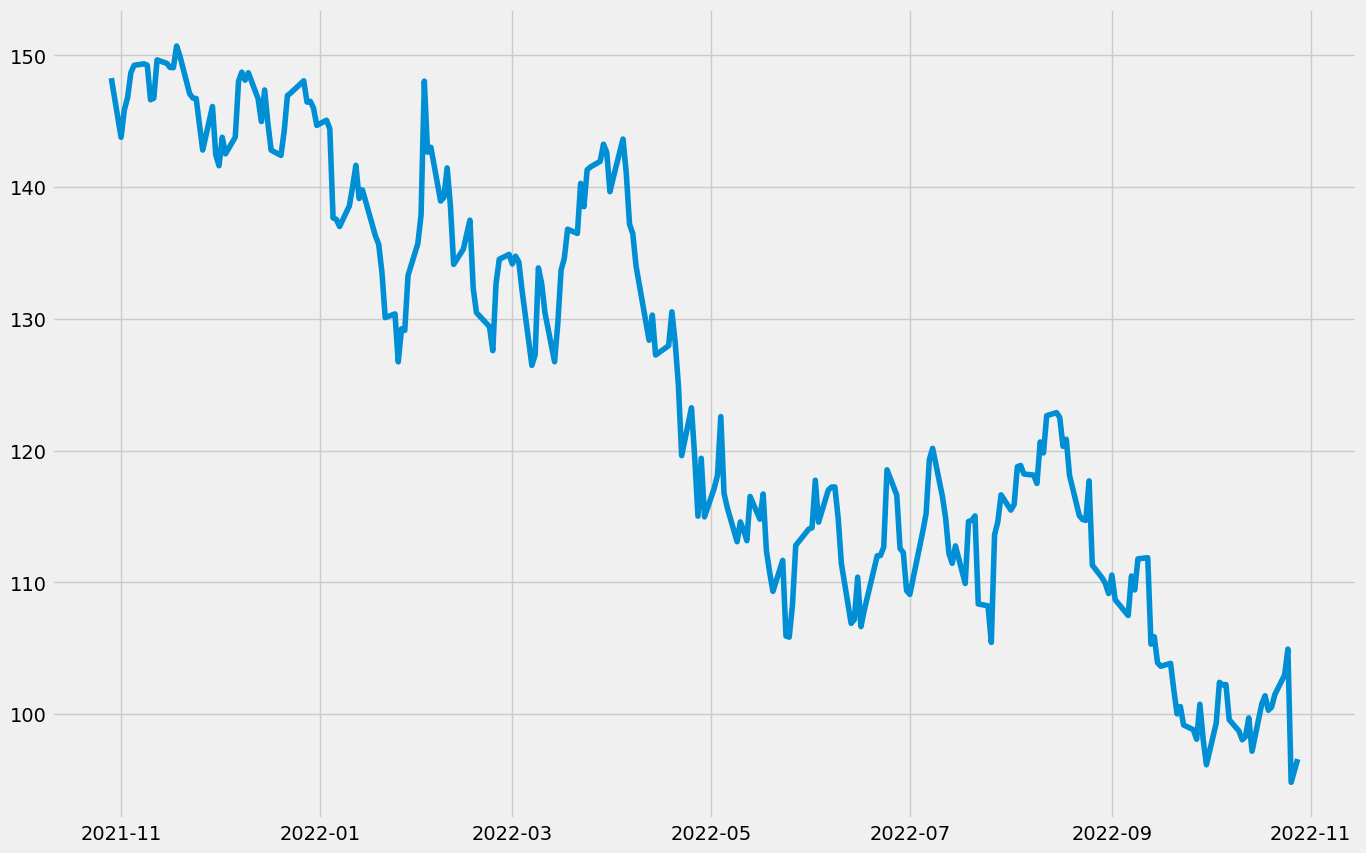

In [5]:
#Now let’s visualize the close prices of Google before moving forward:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data['Date'], data['Close'])

<Figure size 640x480 with 0 Axes>

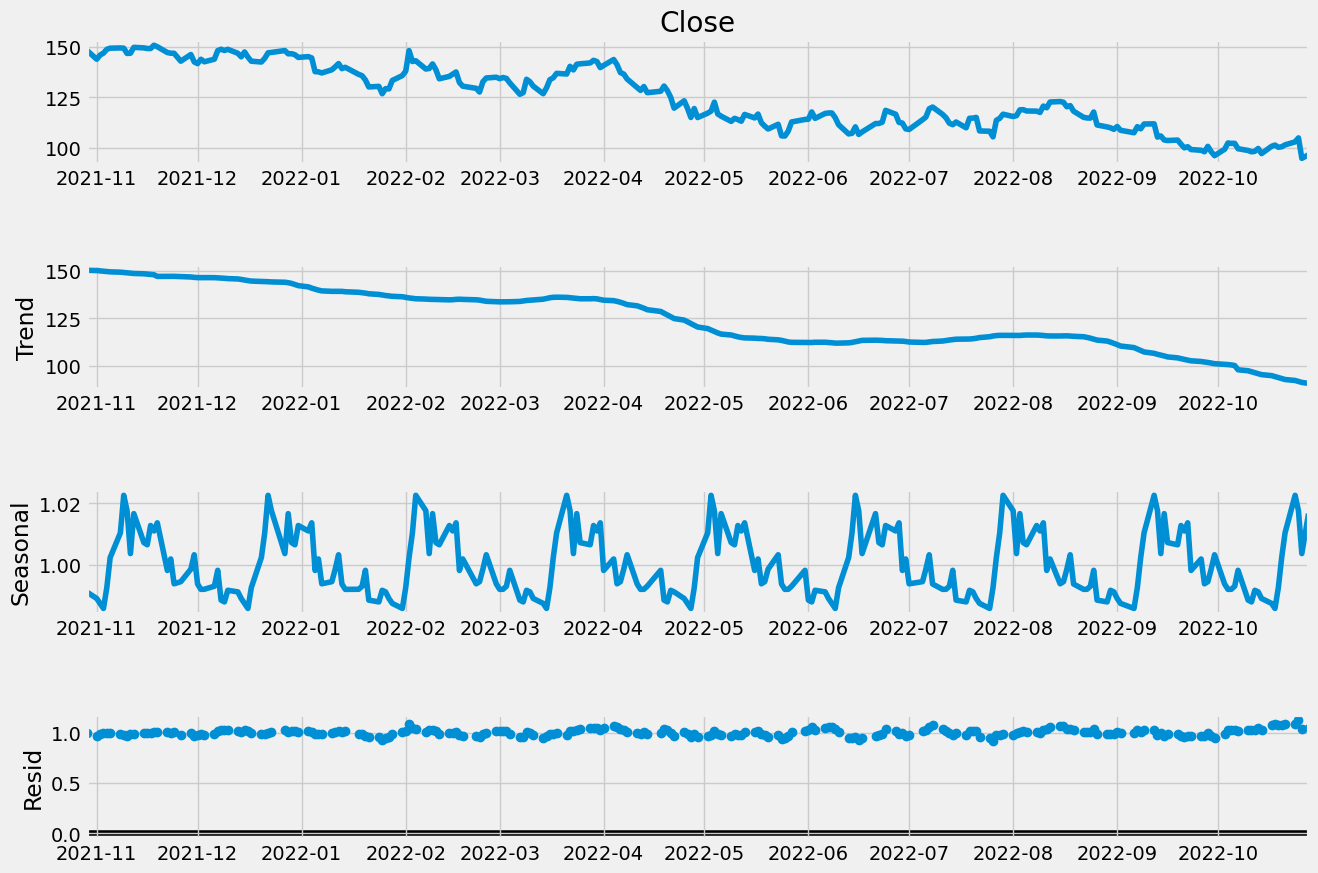

In [7]:
#Using ARIMA for Time Series Forecasting
#Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal.
#The data visualization graph about the closing stock prices above shows that our dataset is not stationary.
#To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Close'], model='multiplicative', extrapolate_trend='freq', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)


In [ ]:
#So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. It will help you learn using both models.

#To use ARIMA or SARIMA, we need to find the p, d, and q values.
#We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot.
#The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

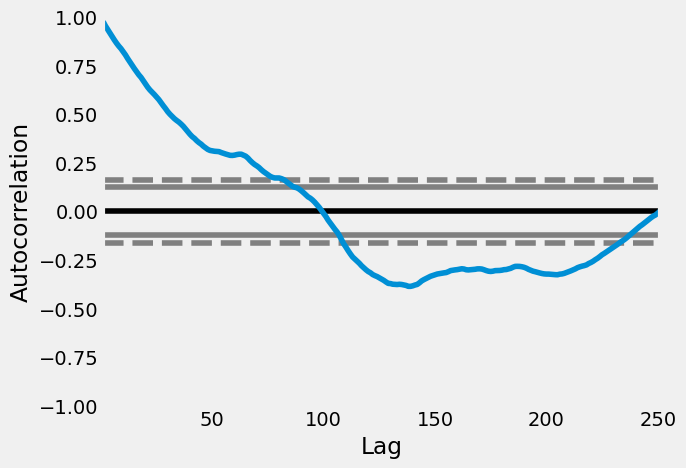

In [8]:
#Now here’s how to find the value of p:
pd.plotting.autocorrelation_plot(data['Close'])

C:\Users\fatih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


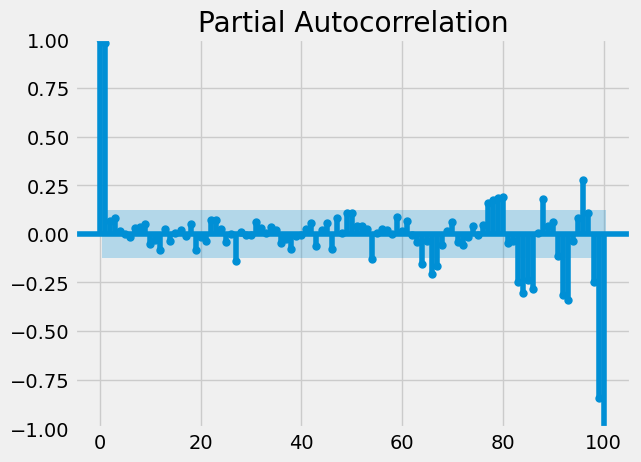

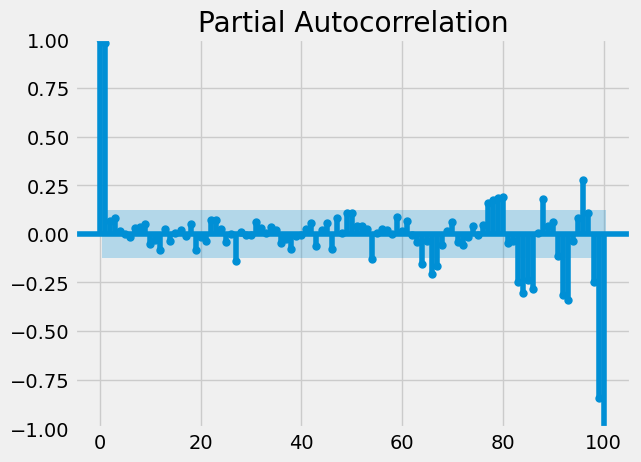

In [10]:
#In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Close'], lags=100)

In [18]:
#In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now let’s build an ARIMA model:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Close'], order=(p,d,q))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -603.647
Date:                Sat, 29 Oct 2022   AIC                           1223.293
Time:                        22:06:50   BIC                           1251.465
Sample:                             0   HQIC                          1234.632
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1587      0.576     -0.275      0.783      -1.288       0.971
ar.L2          0.6462      0.402      1.608      0.108      -0.141       1.434
ar.L3         -0.0082      0.089     -0.092      0.9

In [19]:
#Here’s how to predict the values using the ARIMA model:
predictions = fitted.predict()
print(predictions)

Date
2021-10-29 00:00:00-04:00      0.000000
2021-11-01 00:00:00-04:00    148.270400
2021-11-02 00:00:00-04:00    144.150365
2021-11-03 00:00:00-04:00    145.691177
2021-11-04 00:00:00-04:00    146.956724
                                ...    
2022-10-21 00:00:00-04:00    100.276205
2022-10-24 00:00:00-04:00    101.418344
2022-10-25 00:00:00-04:00    102.737678
2022-10-26 00:00:00-04:00    104.657236
2022-10-28 00:00:00-04:00     95.489758
Name: predicted_mean, Length: 251, dtype: float64


In [20]:
#The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:
import statsmodels.api as sm
import warnings
model = sm.tsa.statespace.SARIMAX(data['Close'],
                                    order = (p,d,q),
                                    seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -588.529
Date:                            Sat, 29 Oct 2022   AIC                           1207.058
Time:                                    22:10:17   BIC                           1259.142
Sample:                                         0   HQIC                          1228.049
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1352      0.105     -1.284      0.199      -0.342       0.071
ar.L2          0.9217      0.114   

In [21]:
#Now let’s predict the future stock prices using the SARIMA model for the next 10 days:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    95.702254
252    96.202841
253    96.929832
254    95.508867
255    95.859954
256    95.768923
257    97.991718
258    97.312330
259    96.808874
260    95.841810
261    95.481740
Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='Date'>

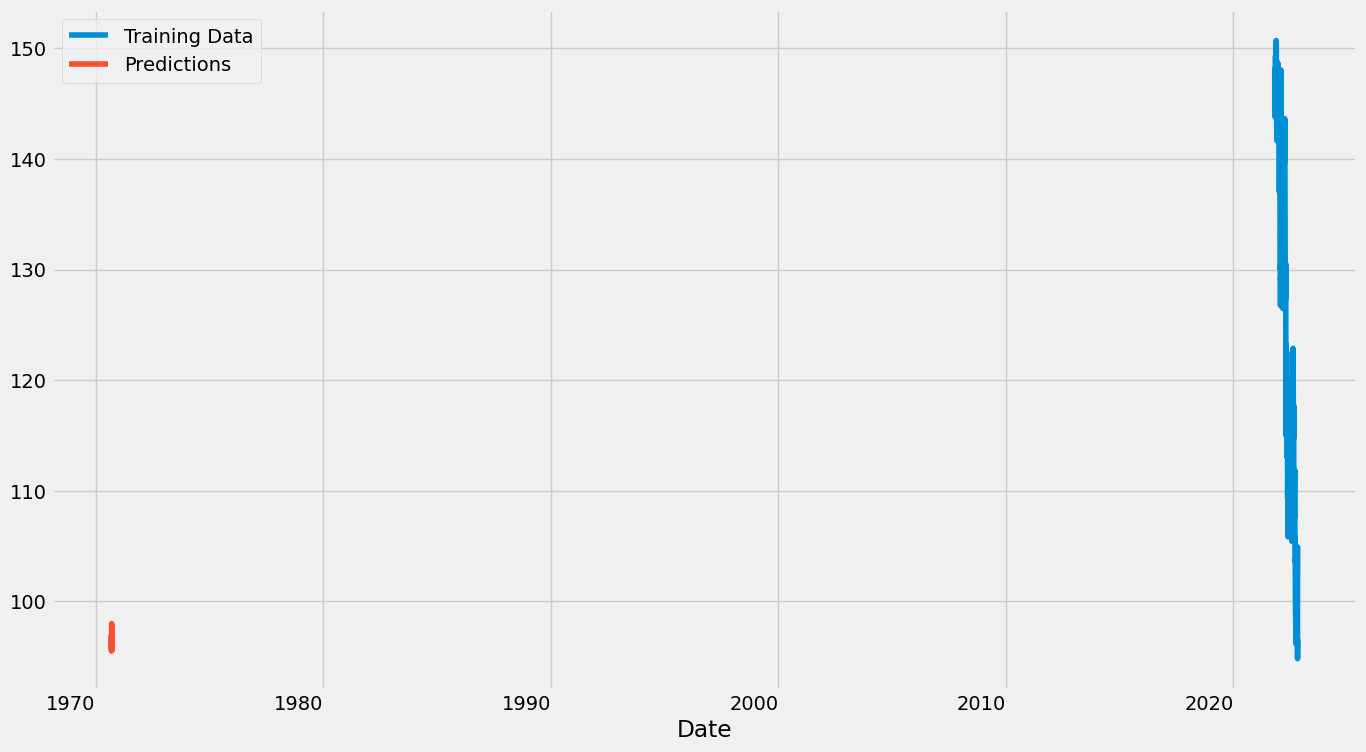

In [22]:
#Here’s how you can plot the predictions:
data['Close'].plot(legend= True, label='Training Data', figsize=(15, 10))
predictions.plot(legend=True, label='Predictions')

In [ ]:
#Summary
#ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. If the data is stationary, we need to use ARIMA, if the data is seasonal, we need to use Seasonal ARIMA (SARIMA).

#i guess something wrong this code, i will check later.